In [1]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math
import pylab 
from sklearn.linear_model import  LassoLarsIC
import scipy.stats as st

In [4]:
def inverse_transform_sampling(n, dist, param):
    gen = np.random.uniform(-125, 2000, 10000000)
    rv = dist(*param)
    return rv.ppf(gen)
import scipy
params = scipy.stats.gamma.fit(data['duration'],method = "MLE")
print(params)

(1.3063608769094566, 3.932994134391037, 199.04784542143736)


C:\space\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\space\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


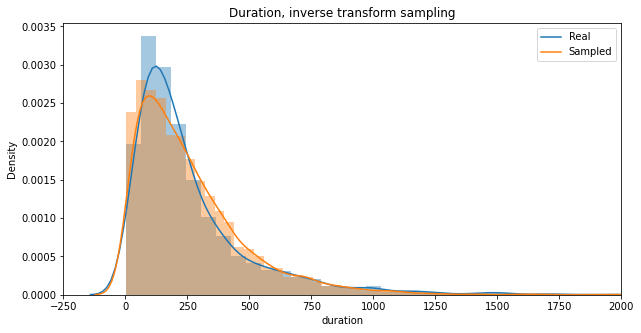

In [5]:
sampled_saleprice = inverse_transform_sampling(10000, st.gamma, params)

plt.figure(figsize=(10, 5))
sns.distplot(data['duration'], kde=True, label='initial data',)
sns.distplot(sampled_saleprice, kde=True, norm_hist=True, label='sampled data')

plt.xlim(-250, 20e2)
plt.ylabel('Density')
plt.title('Duration, inverse transform sampling')
plt.legend(['Real', 'Sampled'])

(6.030625112655185, -304.80114072135575, 286.44771878315373)


C:\space\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\space\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


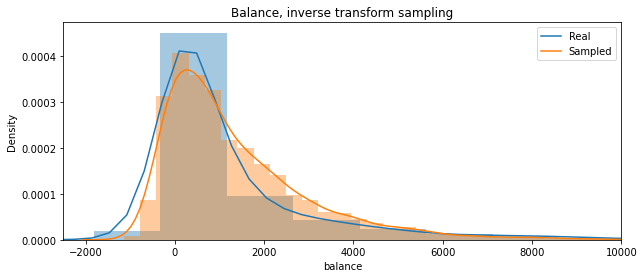

In [6]:
params = scipy.stats.exponnorm.fit(data['balance'],method = "MLE")
print(params)
sampled_saleprice = inverse_transform_sampling(50000, st.exponnorm, params)

plt.figure(figsize=(10, 4))
sns.distplot(data['balance'], kde=True, label='initial data',)
sns.distplot(sampled_saleprice, kde=True, norm_hist=True, label='sampled data')

plt.xlim(-2500, 10e3)
plt.ylabel('Density')
plt.title('Balance, inverse transform sampling')
plt.legend(['Real', 'Sampled'])

(0.3227113174652707, 8.52727694540206, 31.000968757426122)


C:\space\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\space\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


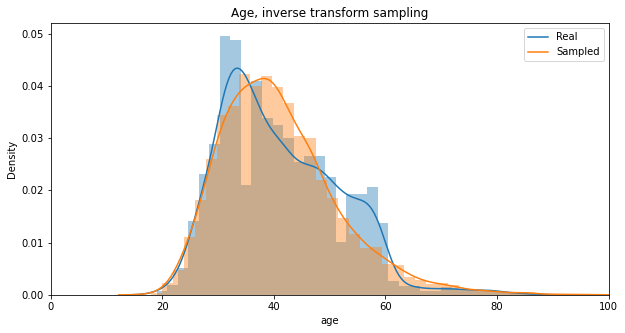

In [7]:
params = scipy.stats.lognorm.fit(data['age'],method = "MLE")
sampled_saleprice = inverse_transform_sampling(1000000, st.lognorm, params)
print(params)
plt.figure(figsize=(10, 5))
sns.distplot(data['age'], kde=True, label='initial data',)
sns.distplot(sampled_saleprice, kde=True, norm_hist=True, label='sampled data')

plt.xlim(0, 100)
plt.ylabel('Density')
plt.title('Age, inverse transform sampling')
plt.legend(['Real', 'Sampled'])

Text(0.5, 1.0, 'M=10')

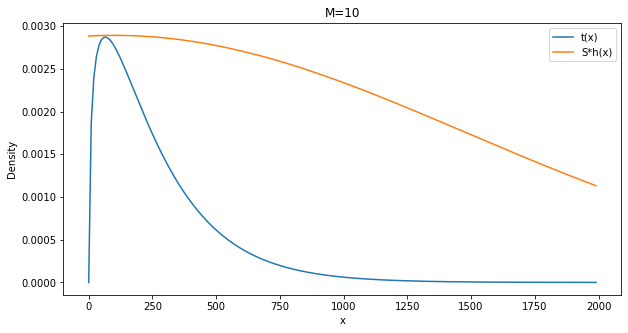

In [8]:
def g(x, mu_, sigma_):
    return 1/np.sqrt(2*np.pi)/sigma_ * np.exp(-0.5*((x-mu_)/sigma_)**2)

upper_params = 100, 1380

M = 10
x_vals = np.arange(0, 2000, 10)
f_vals = st.gamma.pdf(x_vals, 1.3063608769094566, 3.932994134391037, 199.04784542143736)
g_vals = g(x_vals, *upper_params)
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x')
plt.ylabel('Density')
plt.legend(['t(x)', 'S*h(x)'])

plt.title("M=%s" % M)

Num Samples Collected: 99746
Efficiency: 0.1


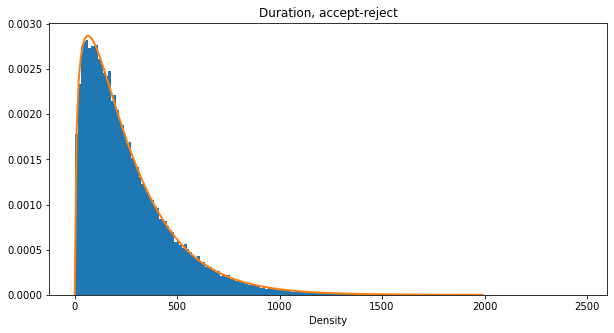

In [9]:
# collect all accepted samples here
samples = []

# try this many candidates
N = 1000000

for _ in range(N):
    # sample a candidate
    candidate = np.random.normal(*upper_params)

    # calculate probability of accepting this candidate
    prob_accept = st.gamma.pdf(candidate, 1.3063608769094566, 3.932994134391037, 199.04784542143736) / (M*g(candidate, *upper_params))

    # accept with the calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

plt.figure(figsize=(10, 5))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x')
plt.xlabel('Density')
plt.plot(x_vals, [f for f in f_vals], linewidth=2)
plt.title('Duration, accept-reject')

print("Num Samples Collected: %s"%len(samples))
print("Efficiency: %s"%round(len(samples) / N, 3))

In [6]:
def g(x, mu_, sigma_):
    return 1/np.sqrt(2*np.pi)/sigma_ * np.exp(-0.5*((x-mu_)/sigma_)**2)

upper_params = 2000, 1300

M = 5
x_vals = np.arange(-2500, 10e3, 100)
f_vals = st.exponnorm.pdf(x_vals, 6.030625112655185, -304.80114072135575, 286.44771878315373)
g_vals = g(x_vals, *upper_params)
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x')
plt.ylabel('Density')
plt.legend(['t(x)', 'S*h(x)'])

plt.title("M=%s" % M)

NameError: name 'st' is not defined

In [7]:
# collect all accepted samples here
samples = []

# try this many candidates
N = 1000000

for _ in range(N):
    # sample a candidate
    candidate = np.random.normal(*upper_params)

    # calculate probability of accepting this candidate
    prob_accept = st.exponnorm.pdf(candidate,  6.030625112655185, -304.80114072135575, 286.44771878315373) / (M*g(candidate, *upper_params))

    # accept with the calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

plt.figure(figsize=(10, 5))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x')
plt.xlabel('Density')
plt.plot(x_vals, [f for f in f_vals], linewidth=2)
plt.title('Balance, accept-reject')

print("Num Samples Collected: %s"%len(samples))
print("Efficiency: %s"%round(len(samples) / N, 3))

NameError: name 'st' is not defined

In [8]:
def g(x, mu_, sigma_):
    return 1/np.sqrt(2*np.pi)/sigma_ * np.exp(-0.5*((x-mu_)/sigma_)**2)

upper_params = 37, 19
M = 2
x_vals = np.arange(0, 100, 1)
f_vals = st.lognorm.pdf(x_vals, 0.3227113174652707, 8.52727694540206, 31.000968757426122)
g_vals = g(x_vals, *upper_params)
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x')
plt.ylabel('Density')
plt.legend(['t(x)', 'S*h(x)'])

plt.title("M=%s" % M)

NameError: name 'st' is not defined

In [9]:
samples = []

# try this many candidates
N = 1000000

for _ in range(N):
    # sample a candidate
    candidate = np.random.normal(*upper_params)

    # calculate probability of accepting this candidate
    prob_accept = st.lognorm.pdf(candidate,  0.3227113174652707, 8.52727694540206, 31.000968757426122) / (M*g(candidate, *upper_params))

    # accept with the calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

plt.figure(figsize=(10, 5))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x')
plt.xlabel('Density')
plt.plot(x_vals, [f for f in f_vals], linewidth=2)
plt.title('Age, accept-reject')

print("Num Samples Collected: %s"%len(samples))
print("Efficiency: %s"%round(len(samples) / N, 3))

NameError: name 'st' is not defined

In [10]:
from bayesian.train_bn import structure_learning, parameter_learning
from preprocess.discretization import get_nodes_type, discretization, code_categories, get_nodes_sign
from bayesian.save_bn import save_structure, save_params, read_structure, read_params
from bayesian.sampling import generate_synthetics
from bayesian.calculate_accuracy import calculate_acc
from external.libpgm.hybayesiannetwork import HyBayesianNetwork
from visualization.visualization import draw_BN

ModuleNotFoundError: No module named 'bayesian'

In [3]:

data = pd.read_csv('bank.csv', sep = ';')

data.dropna()
data.reset_index(inplace=True, drop=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


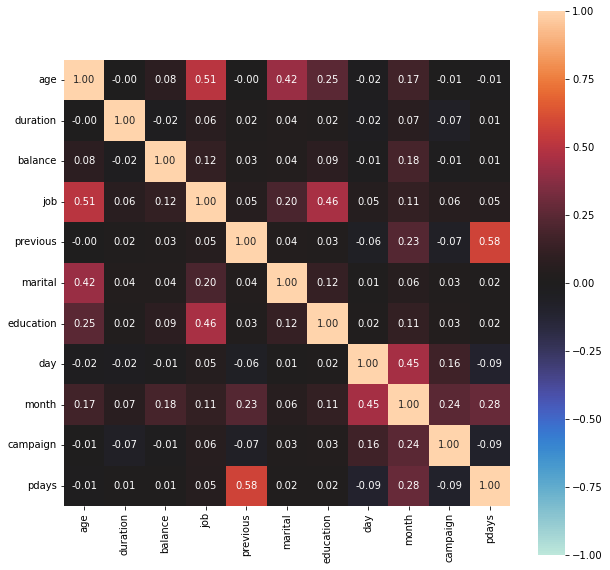

In [30]:
from dython.nominal import associations
X = data[['age', 'duration','balance','job','previous', 'marital', 'education',   'day', 'month', 'campaign', 'pdays']]
ass_plot=associations(X, figsize = (10,10))